In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt


In [6]:
!pip install tensorflow

  Could not find a version that satisfies the requirement tensorflow (from versions: )
No matching distribution found for tensorflow


In [2]:
ndata=pd.read_csv("D:/Downloads/of.csv")

   The following are the features
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [9]:
ndata.head(10)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
ndata.loc[ndata['area']==0.0,'fire']=0
ndata['fire'].fillna(1,inplace=True)
ndata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [4]:
ndata=pd.get_dummies(ndata, columns=['month','day'])

In [5]:
ndata.isnull().any()

X            False
Y            False
FFMC         False
DMC          False
DC           False
ISI          False
temp         False
RH           False
wind         False
rain         False
area         False
fire         False
month_apr    False
month_aug    False
month_dec    False
month_feb    False
month_jan    False
month_jul    False
month_jun    False
month_mar    False
month_may    False
month_nov    False
month_oct    False
month_sep    False
day_fri      False
day_mon      False
day_sat      False
day_sun      False
day_thu      False
day_tue      False
day_wed      False
dtype: bool

In [6]:
ndata.head()
data=ndata[['month','FFMC','DMC','DC','ISI','temp','RH','wind','rain','fire']]

C:\Users\User\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\User\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\User\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda2\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


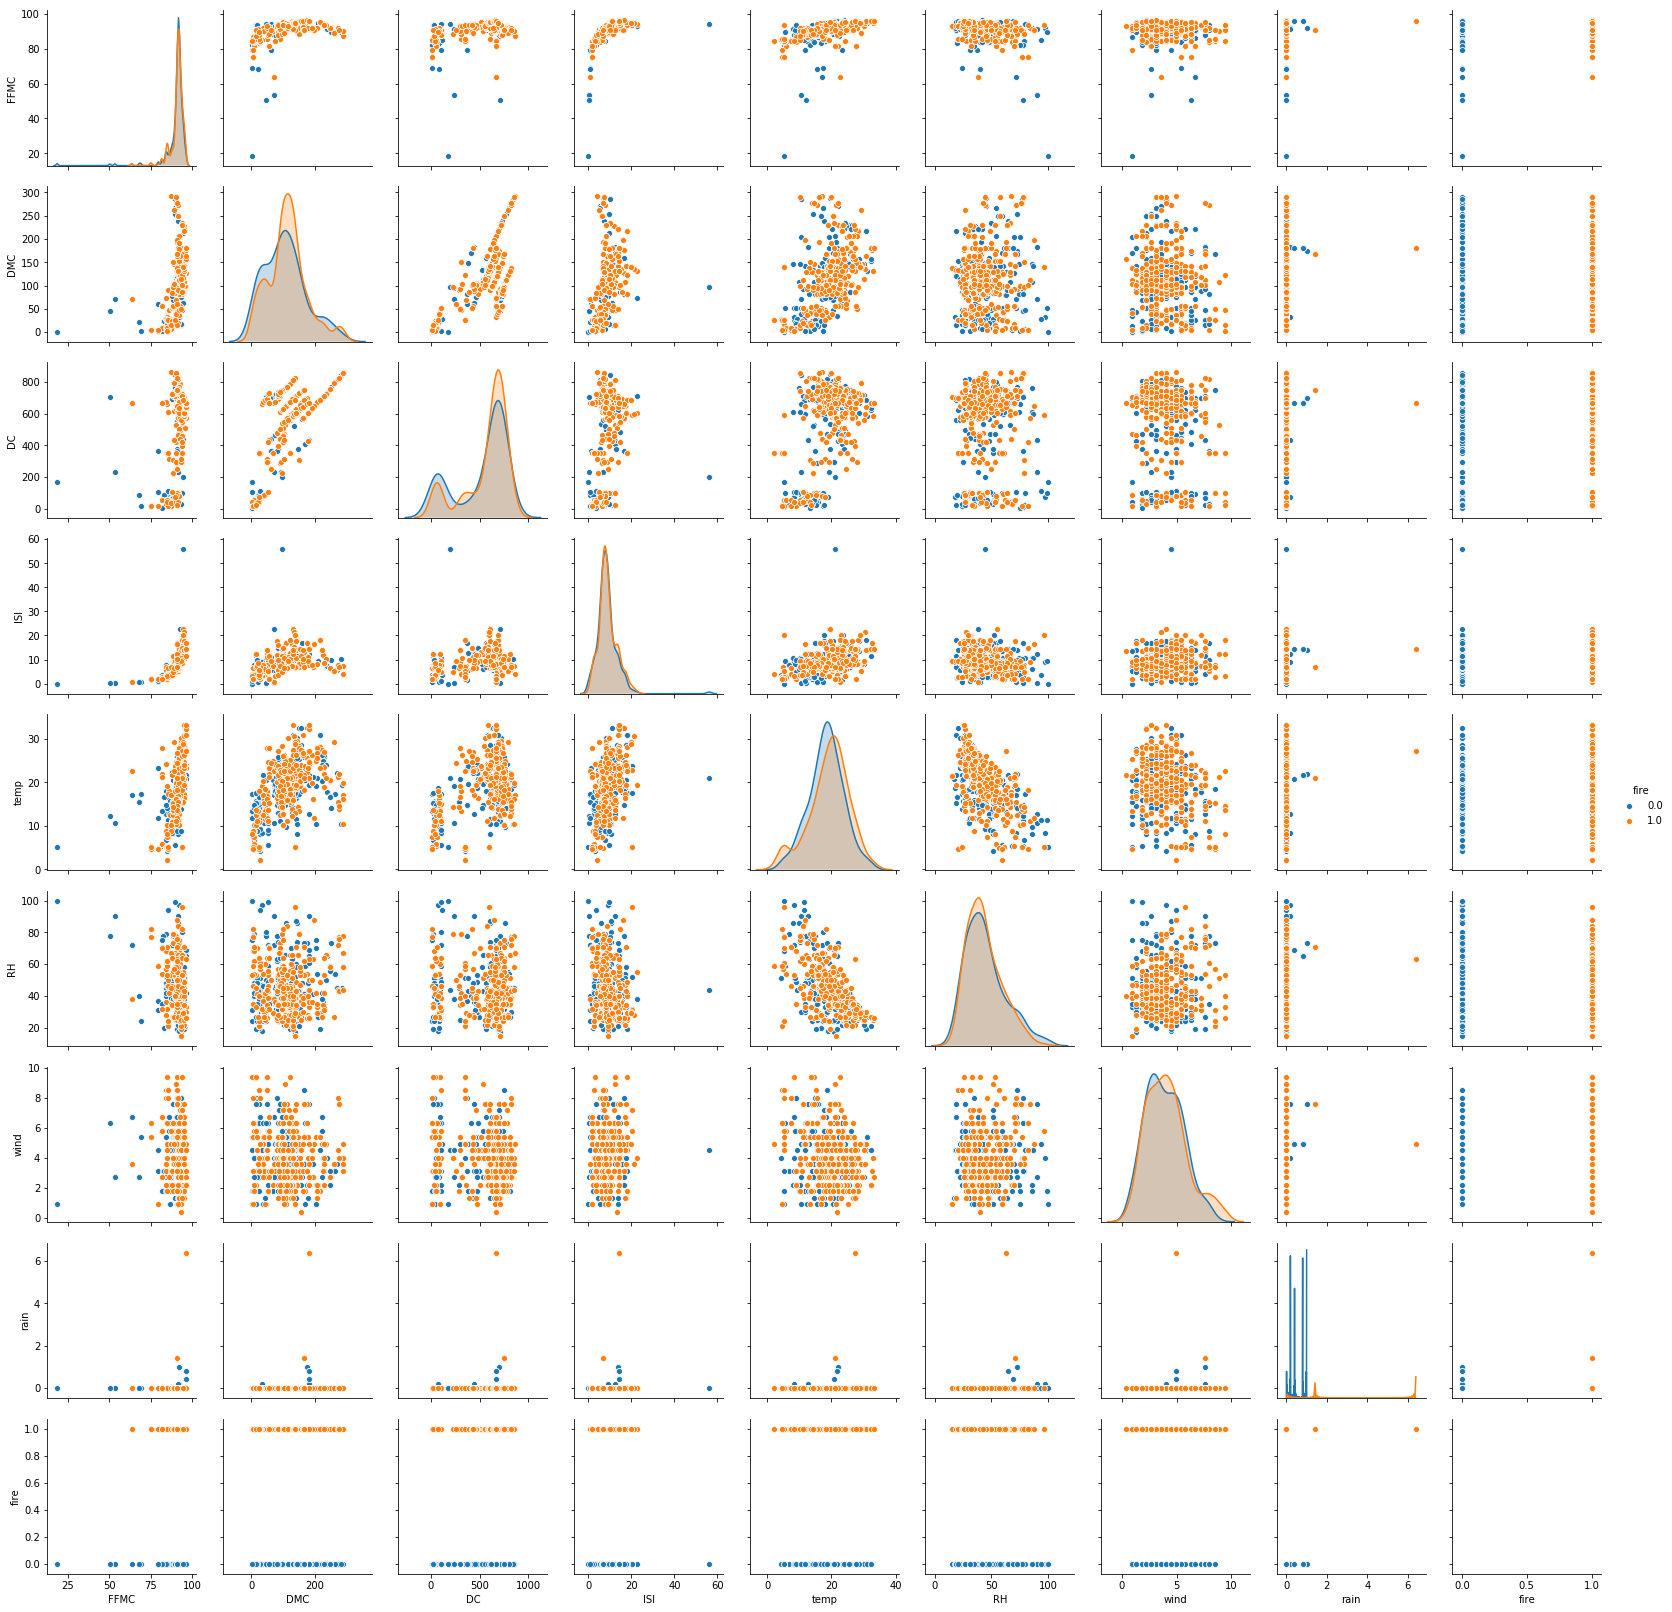

In [7]:
sns.pairplot(data,hue="fire")

#### There are no missing values

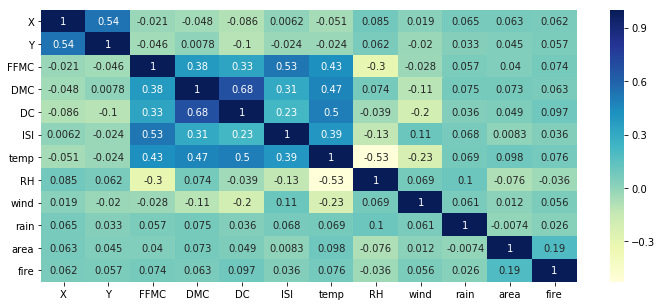

In [125]:
fig, ax = plt.subplots(figsize=(12,5))

sns.heatmap(ndata.corr(),annot = True,cmap="YlGnBu");
fig.savefig('foo.png')

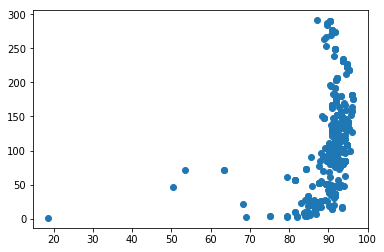

In [11]:
e = [0.5, 1., 1.5, 2.]
plt.errorbar(ndata.FFMC, ndata.DMC, fmt='o')
fig.savefig('fo.png')

<Container object of 3 artists>

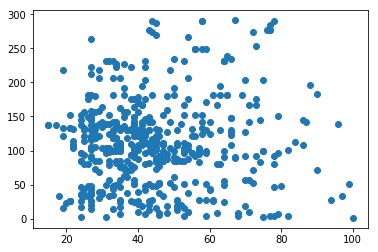

In [83]:
plt.errorbar(ndata.RH, ndata.DMC, fmt='o')

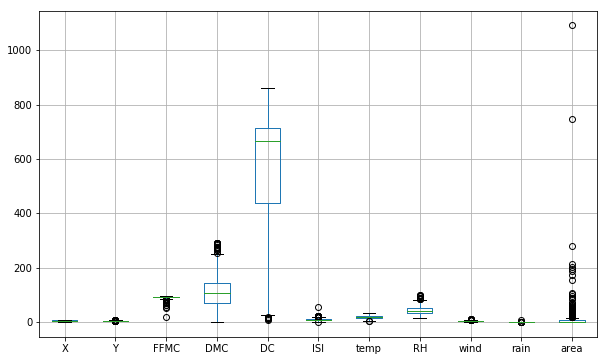

In [60]:
plt.figure(figsize=(10,6))
ndata.boxplot()


In [11]:
ndata[['month','FFMC','DMC','DC','ISI','temp','RH','wind','rain','fire']].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,0.522244
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,0.499989
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1.000000


In [38]:
forest=ndata[ndata.area>0.0]
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,place
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,"9,9"
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,"1,4"
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,"2,5"
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,"1,2"
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,"8,6"


In [39]:
month=forest[['FFMC','DC','ISI','temp','RH','month']].groupby('month').size().reset_index(name='counts')
month=pd.DataFrame(month)
month

,month,counts
0,apr,4
1,aug,99
2,dec,9
3,feb,10
4,jul,18
5,jun,8
6,mar,19
7,may,1
8,oct,5
9,sep,97


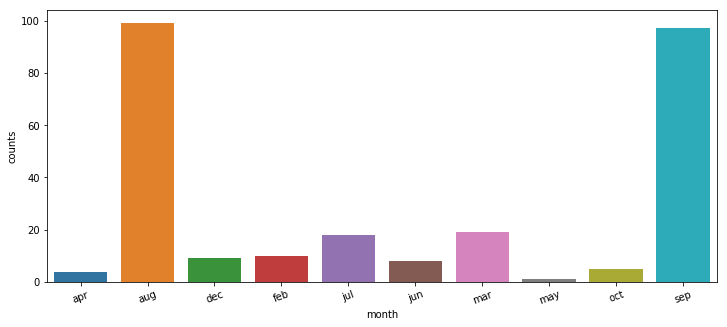

In [40]:
#The months in which the forest fires occur frequently
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'month', y = 'counts', data = month)
plt.xticks(rotation=20);

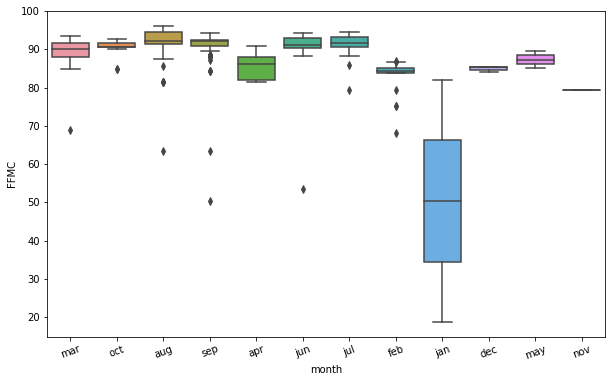

In [41]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='FFMC', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

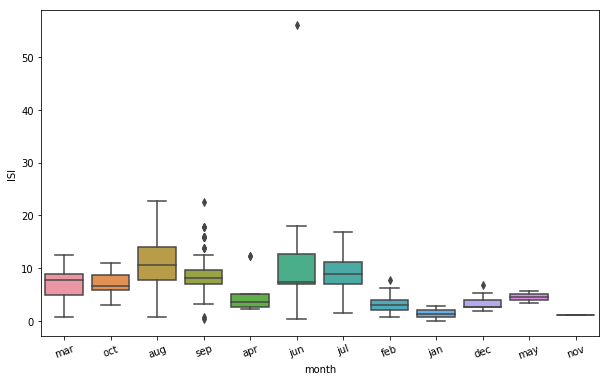

In [42]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='ISI', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

### August and September are the 2 months where the forest fires occur frequently 

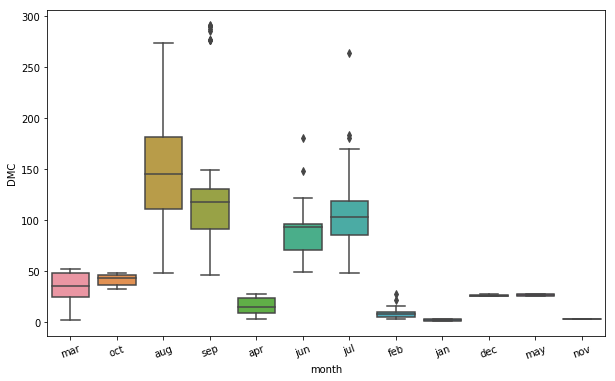

In [43]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='DMC', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

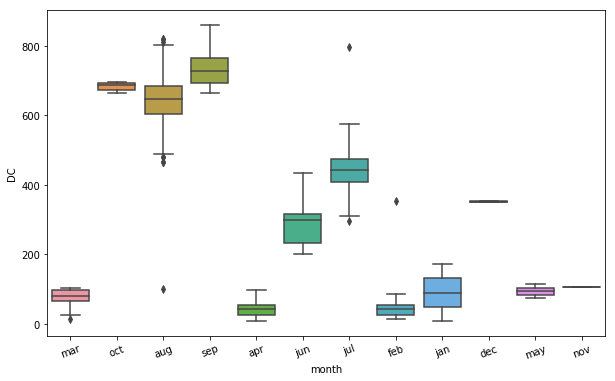

In [44]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='DC', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

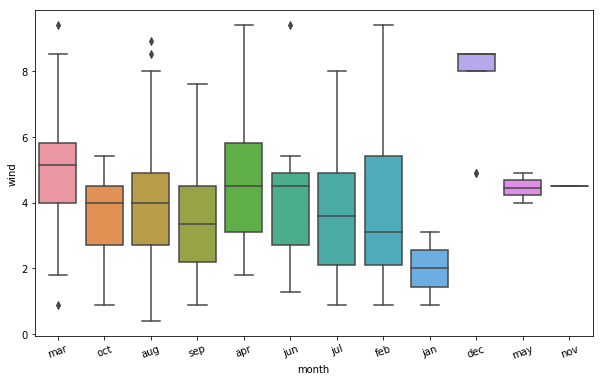

In [5]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='wind', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

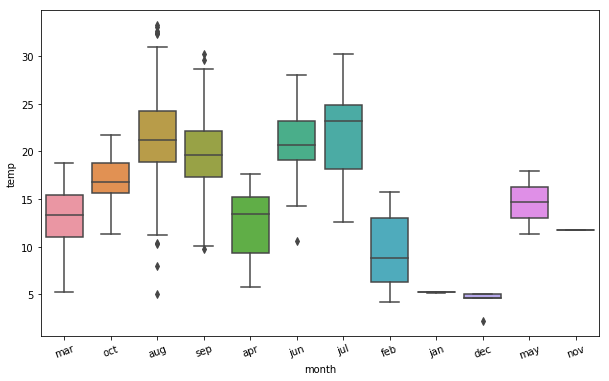

In [45]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='temp', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

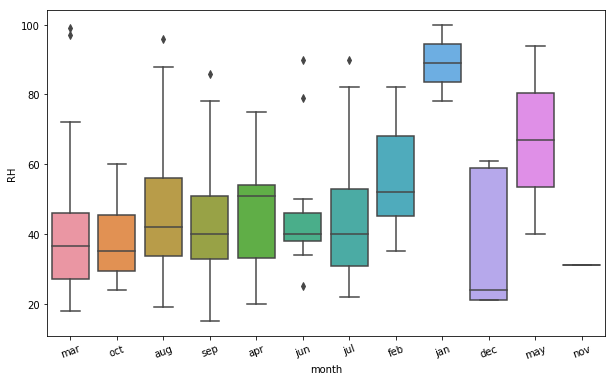

In [46]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='RH', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

In [47]:
place=forest[['FFMC','DC','ISI','temp','RH','place']].groupby('place').size().reset_index(name='counts')
place=pd.DataFrame(place)
place.head()

,place,counts
0,"1,2",4
1,"1,3",7
2,"1,4",10
3,"1,5",4
4,"2,2",11


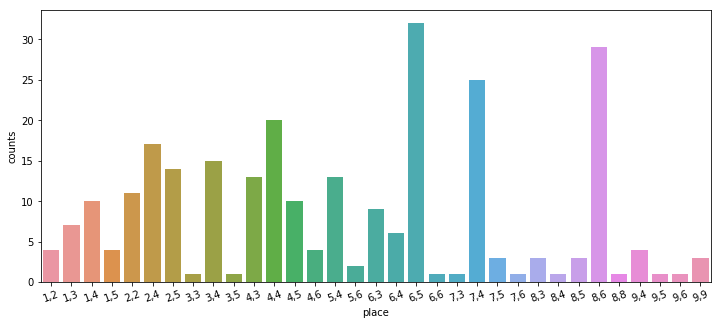

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'place', y = 'counts', data = place)
plt.xticks(rotation=20);

### As you can see at the place (6,5) the forest fire has occured more frequently than the rest

In [48]:
ndata.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


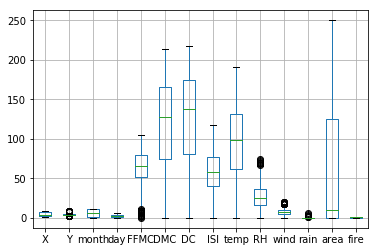

In [48]:
ndata.boxplot()

In [12]:
fire=ndata.groupby('fire')['fire'].count()
fire=pd.DataFrame(fire)
fire

,fire
fire,
0.0,247
1.0,270


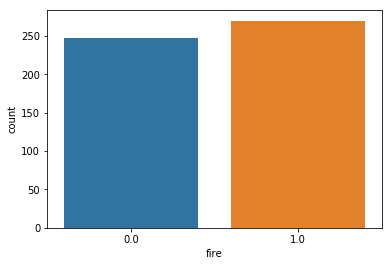

In [6]:
sns.countplot(x="fire", data=ndata)

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

from sklearn.preprocessing import scale
colu=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','fire']

for col in colu:
    ndata[col] = le.fit_transform(ndata[col])

In [7]:
ndata.head(10)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,28,37,41,29,12,34,14,0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,56,49,144,42,85,16,1,0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,56,56,156,42,55,16,2,0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,67,48,33,64,13,72,8,1,...,0,0,0,1,0,0,0,0,0,0
4,8,6,46,66,46,68,30,73,3,0,...,0,0,0,0,0,0,1,0,0,0
5,8,6,73,93,91,102,125,12,11,0,...,0,0,0,0,0,0,1,0,0,0
6,8,6,73,98,92,59,144,10,6,0,...,0,0,0,0,1,0,0,0,0,0
7,8,6,65,167,118,76,11,66,4,0,...,0,0,0,0,1,0,0,0,0,0
8,8,6,60,149,161,44,42,46,11,0,...,0,0,1,0,0,0,0,0,1,0
9,7,5,75,95,164,45,131,23,8,0,...,0,0,1,0,0,1,0,0,0,0


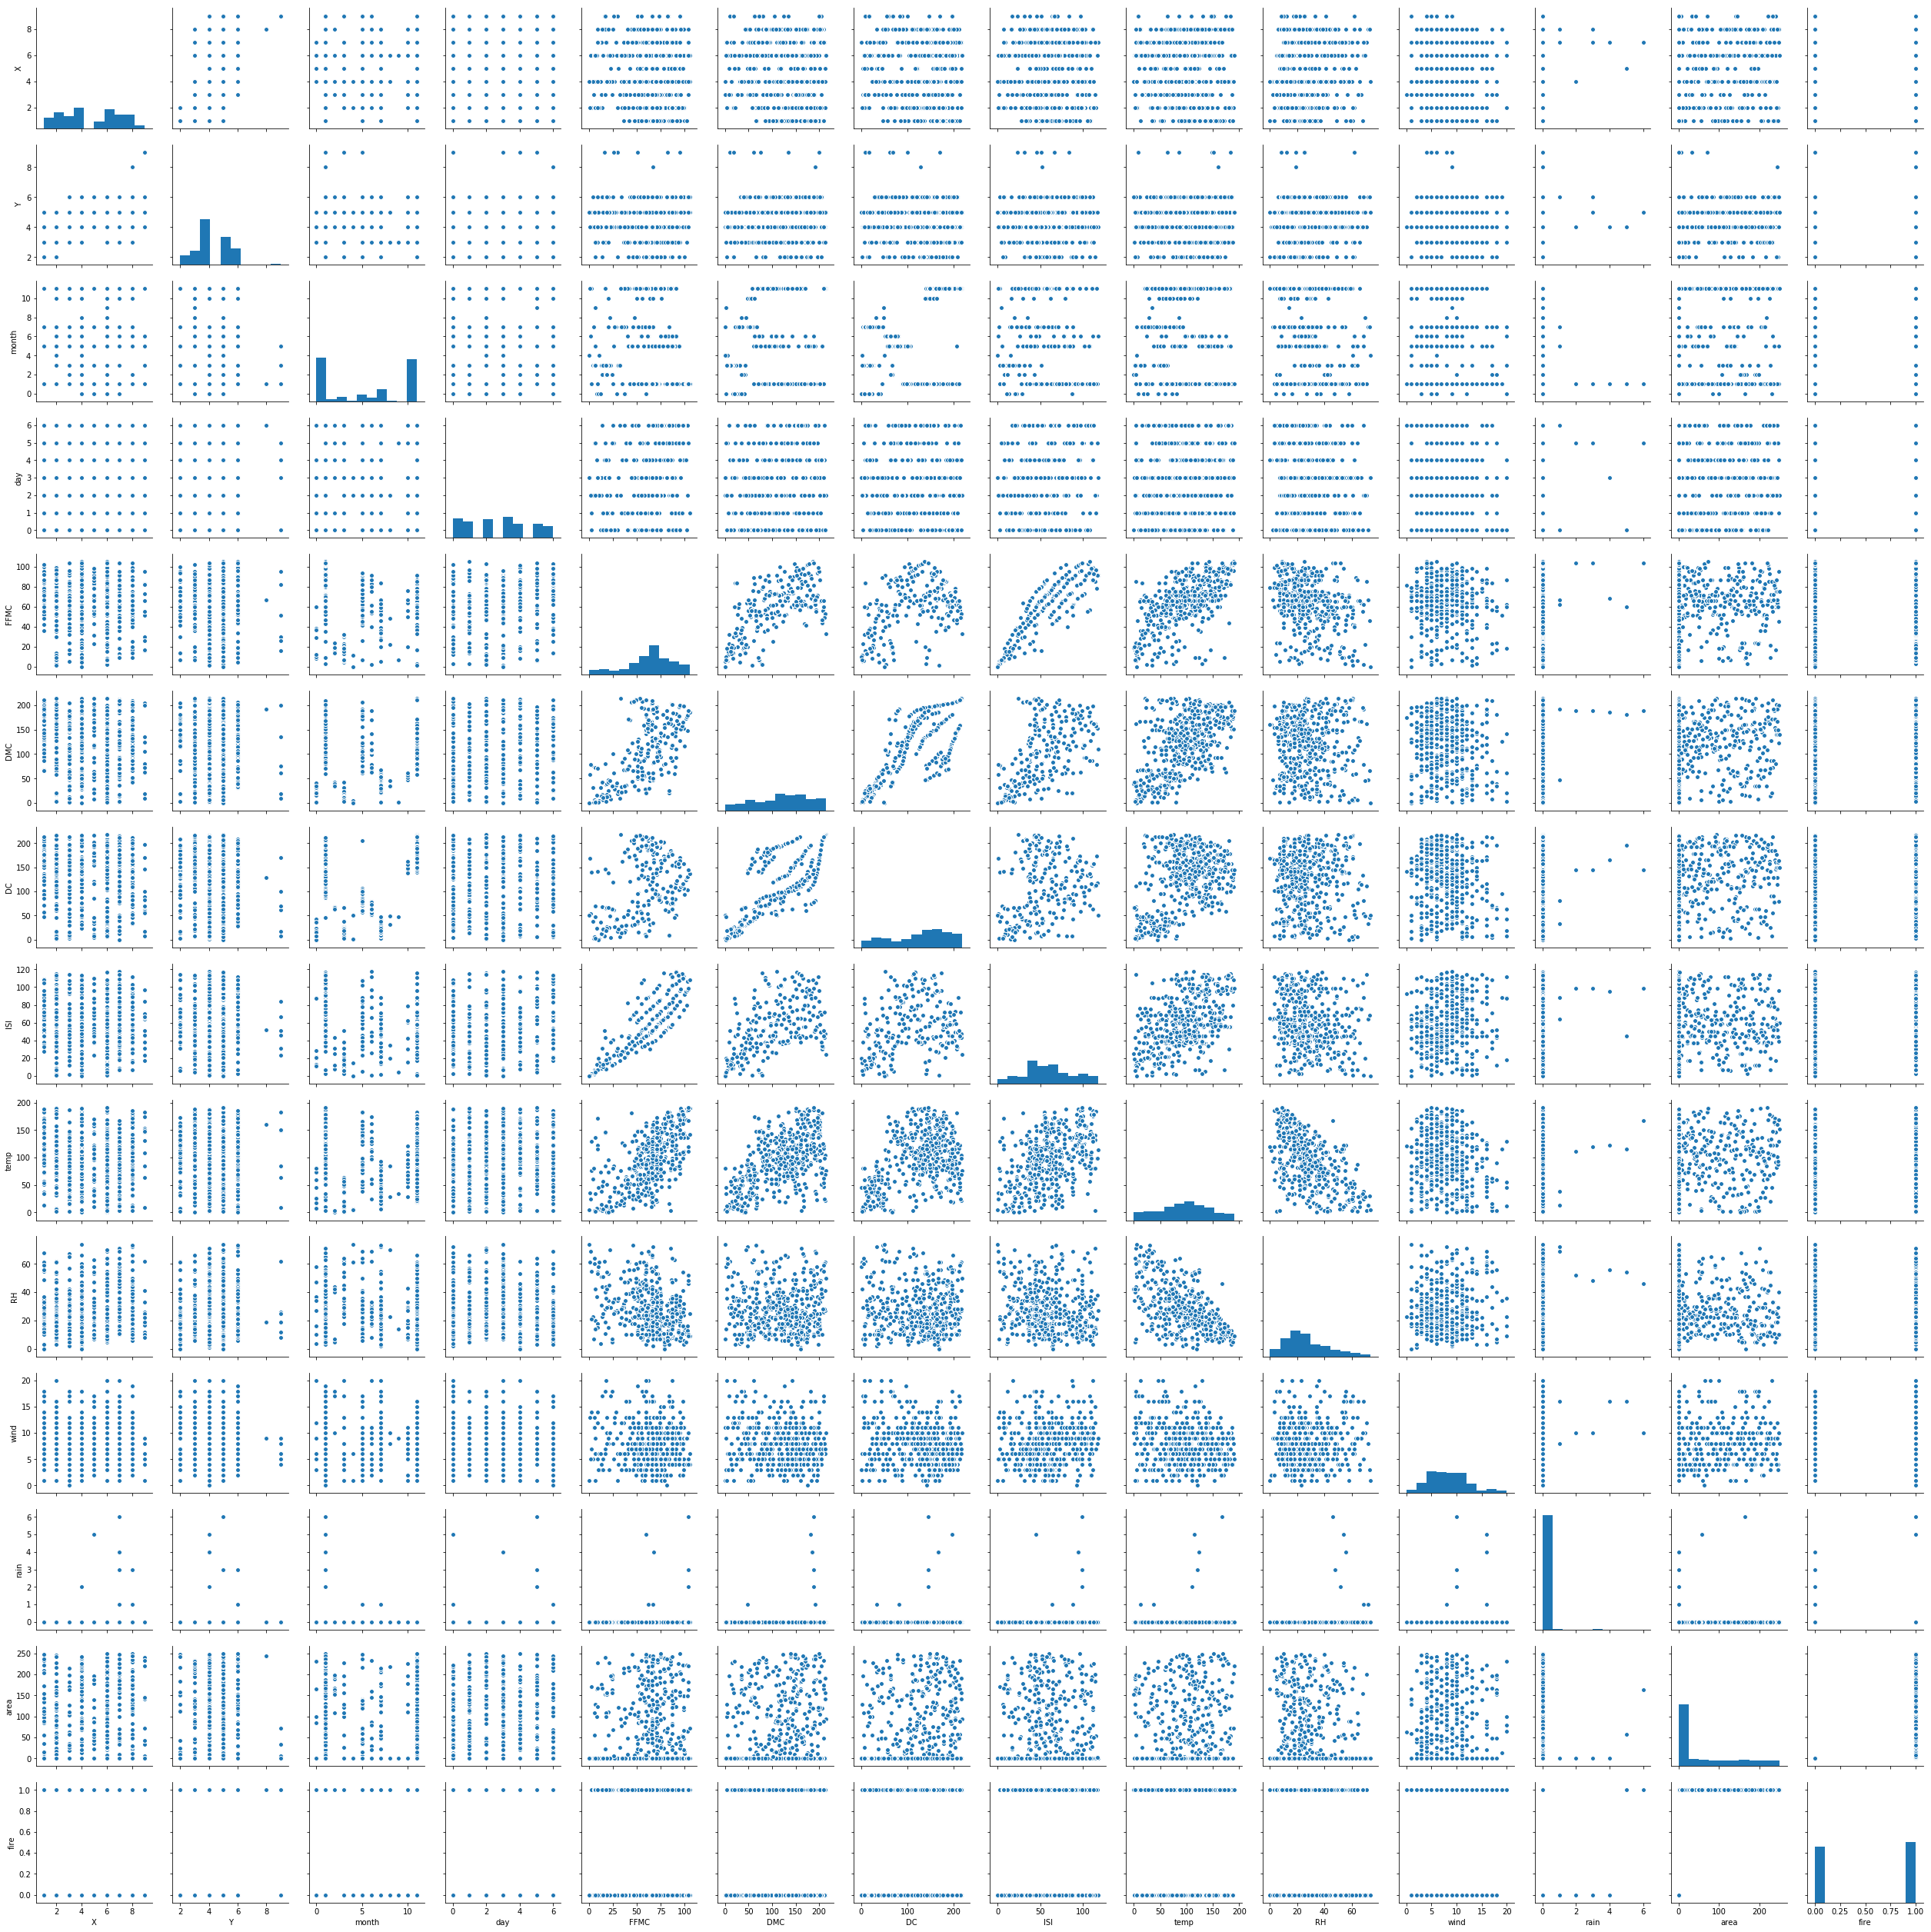

In [66]:
sns.pairplot(ndata,hue="class")

In [20]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ndata))
ndata = ndata[(z < 3).all(axis=1)]


In [12]:
ndata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [18]:
X = ndata.iloc[:, [2,3,4,5,6,7,8]].values
y = ndata.iloc[:, 11].values

In [606]:
X = ndata.iloc[:, [2,3,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]].values
y = ndata.iloc[:, 11].values

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
df = pd.DataFrame(data = principalComponents, columns = ['1','2','3','4','5'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [58]:
from numpy.linalg import svd
df=svd(X)

In [12]:
ndata.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,28,37,41,29,12,34,14,0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,56,49,144,42,85,16,1,0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,56,56,156,42,55,16,2,0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,67,48,33,64,13,72,8,1,...,0,0,0,1,0,0,0,0,0,0
4,8,6,46,66,46,68,30,73,3,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
results=[]
names=[]

### With PCA 

In [21]:
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001,intercept_scaling=1)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='micro')
results.append(score)
names.append("Logistic Regression")
score

D:\Anancona\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6826923076923077

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Bagging Classifier")
score

0.5294996265870052

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("AdaBoost Classifier")
score

0.5792778649921507

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Gradient Boosting")
score

0.5487169803098422

In [25]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("XGB")
score

0.5435032437442076

In [26]:
from sklearn.svm import SVC
clf = SVC(random_state = 100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("SVM")
score


D:\Anancona\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4266026758184304

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Random Forest")
score


0.5114116652578191

In [50]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(3, 13, 1)
n_neighbors
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred,average='weighted')
    accuracies.append(accuracy)
accuracies
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("K-NN with 5 neighbors")
score

0.5114116652578191

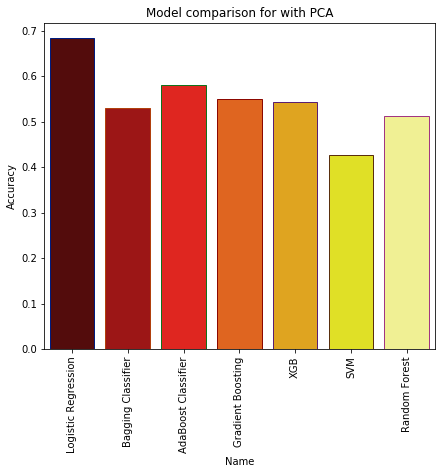

In [28]:
comp=pd.DataFrame({'Name':names , 'Accuracy': results})
plt.subplots(figsize=(7,6))
sns.barplot(x="Name", y="Accuracy",data=comp,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model comparison for with PCA')
plt.show()

### Without PCA - scaling before spliting

In [24]:
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')


D:\Anancona\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anancona\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4221388367729831

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.5220924908424909

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.5435032437442076

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.68385460693153

In [664]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.636258793680083

In [665]:
from sklearn.svm import SVC
clf = SVC(random_state = 100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')


0.6551888235494067

In [666]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')
#accuracy

0.5013182674199624

In [667]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(3, 13, 1)
n_neighbors
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred,average='weighted')
    accuracies.append(accuracy)
accuracies

[0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624,
 0.5013182674199624]

### Without PCA scaling after splitting

In [55]:
X = ndata.iloc[:, [2,3,4,5,6,7,8]].values
y = ndata.iloc[:, 11].values

In [56]:
results=[]
names=[]

In [637]:
X = ndata.iloc[:, [2,3,4,5,6,7,8,12,13,14,15,22,23,24,25,26,27,28,29,30]].values
y = ndata.iloc[:, 11].values

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


D:\Anancona\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Random forest")
score

0.5013182674199624

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Gradient Boosting")
score

0.68385460693153

In [60]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("AdaBoost Classifier")
score

0.5435032437442076

In [61]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("XGB")
score

0.636258793680083

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Bagging Classifier")
score

0.576923076923077

In [63]:
from sklearn.svm import SVC

clf = SVC(random_state = 100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("SVM")
score

D:\Anancona\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6633296445942816

In [64]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("Logistic Regression")
score

D:\Anancona\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anancona\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4221388367729831

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred,average='weighted')
results.append(score)
names.append("K-NN with 5 neighbors")
score

D:\Anancona\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4221388367729831

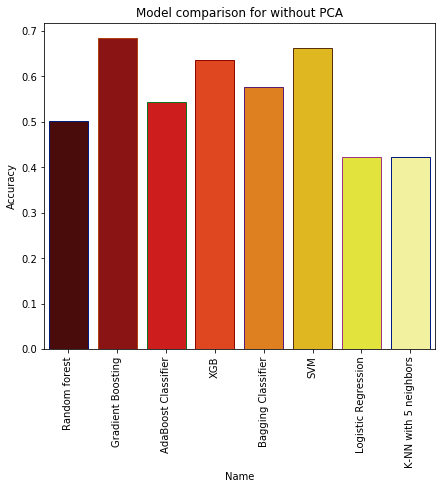

In [66]:
comp=pd.DataFrame({'Name':names , 'Accuracy': results})
plt.subplots(figsize=(7,6))
sns.barplot(x="Name", y="Accuracy",data=comp,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model comparison for without PCA')
plt.show()

In [28]:
n_neighbors = np.arange(3, 13, 1)
n_neighbors
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred,average='weighted')
    accuracies.append(accuracy)
accuracies


[0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831,
 0.4221388367729831]

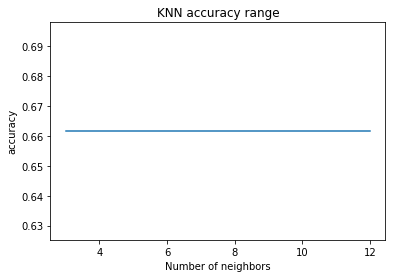

In [292]:
plt.title('KNN accuracy range')
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors, accuracies)
plt.show()

### As you can see Logistic regression gives the best accuracy along with Knn having 7-9 neighbours

In [115]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.4578313253012048

### This shows that the given data set has a lot of bias and hence the model is underfitting and the no. of samples is just 517

Perform cross validation

In [116]:
from sklearn.model_selection import KFold
kfold = KFold(3, True, 1)

In [117]:

for train, test in kfold.split(X):
    print('train: %s, test: %s' % (X[train],X[test]))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    

train: [[ 28  37  41 ...  12  34   0]
 [ 56  49 144 ...  85  16   0]
 [ 56  56 156 ...  55  16   0]
 ...
 [  9  71 141 ... 123  54   0]
 [ 92 168 122 ... 156  25   0]
 [  7   2  48 ...  34  14   0]], test: [[ 46  66  46 ...  30  73   0]
 [ 73  93  91 ... 125  12   0]
 [ 73  98  92 ... 144  10   0]
 ...
 [ 60 181 196 ... 115  54   5]
 [  9  71 141 ... 172  15   0]
 [  9  71 141 ... 116  53   0]]
train: [[ 56  49 144 ...  85  16   0]
 [ 56  56 156 ...  55  16   0]
 [ 67  48  33 ...  13  72   1]
 ...
 [  9  71 141 ... 172  18   0]
 [  9  71 141 ... 172  15   0]
 [  9  71 141 ... 116  53   0]], test: [[ 28  37  41 ...  12  34   0]
 [ 60 149 161 ...  42  46   0]
 [ 75  95 164 ... 131  23   0]
 ...
 [  9  71 141 ... 123  54   0]
 [ 92 168 122 ... 156  25   0]
 [  7   2  48 ...  34  14   0]]
train: [[ 28  37  41 ...  12  34   0]
 [ 46  66  46 ...  30  73   0]
 [ 73  93  91 ... 125  12   0]
 ...
 [  9  71 141 ... 116  53   0]
 [ 92 168 122 ... 156  25   0]
 [  7   2  48 ...  34  14   0]], test

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5465116279069767

In [119]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_test, y_pred))
rmse1


0.5394806964430009

In [120]:
ndata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,7,0,28,37,41,29,12,34,14,0,0,0
1,7,4,10,5,56,49,144,42,85,16,1,0,0,0
2,7,4,10,2,56,56,156,42,55,16,2,0,0,0
3,8,6,7,0,67,48,33,64,13,72,8,1,0,0
4,8,6,7,3,46,66,46,68,30,73,3,0,0,0
